In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path

path.append('./../')
import spineSimulator
from spineSimulator import plot

#path.append('./../spineSimulator/')
#import plot
#from simulation_parameters import simulation_parameters

#from importlib import reload
#reload(plot)

In [3]:
# text rendering with LaTex
#plt.rc('text', usetex=True)
#plt.rc('font', family='sans')

In [4]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')

cum_R = np.cumsum(1./g_ij, axis=1)


# Figure 04
compare depolarisation for different time courses of spine current input and dendrite depolarisation.

In [5]:
def get_normalized_NMDAR_conductance(a,b):  
    def g(v):
        return 1. / (1. + a * np.exp(b*v))
    return g

# values taken from Chiu &Carter 2022 FNCellNeuro
g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=0.073, b=-0.074)

In [6]:
# values are taken from https://www.csc.kth.se/utbildning/kth/kurser/DD2435/biomod12/kursbunt/f9/KochCh1Destexhe.pdf
# destehexe 1997
"""
g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=2./3.57, b=-0.062)
"""

'\ng_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=2./3.57, b=-0.062)\n'

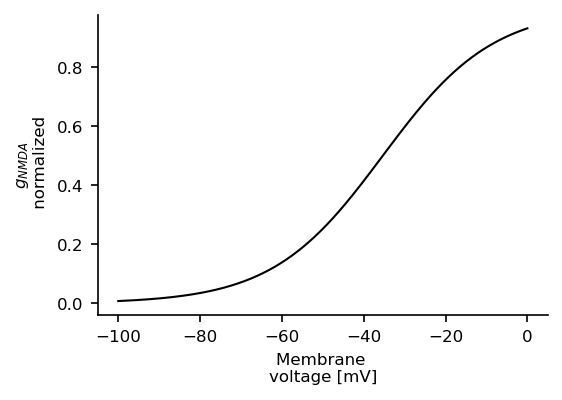

In [7]:
def ax_g_NMDAR(fig, pos, a, b):
    g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=a, b=b)
    
    v = np.linspace(-100, 0,1000)
    g = g_NMDAR_CA1(v)
    
    ax = fig.add_axes(pos)
    
    ax.plot(v,g, 'k-', lw=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlabel('Membrane \nvoltage [mV]', fontsize=8)
    ax.set_ylabel('$g_{NMDA}$\n normalized', fontsize=8)
    
    ax.tick_params(labelsize=8)

    
fig = plt.figure(figsize=(3,2), dpi=150)
pos = [0,0,1,1]
ax_g_NMDAR(fig, pos, 0.073, -0.074)

plt.show()
    

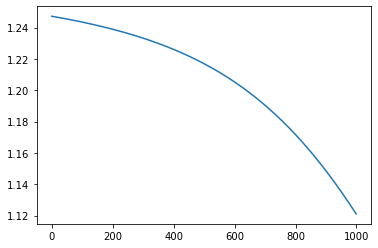

In [8]:
v = np.linspace(-100, -50,1000)
v2 = v+3.5
g1 = g_NMDAR_CA1(v)
g2 = g_NMDAR_CA1(v2)
i1 = g1 * v
i2 = g2 * v2
plt.plot(i2/i1)

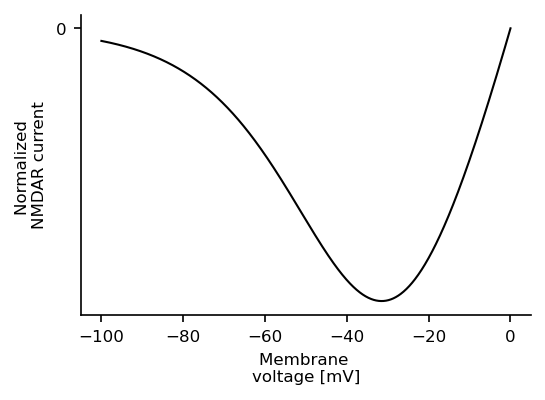

In [9]:
def ax_NMDAR_current(fig, pos, a, b):
    g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=a, b=b)
    
    v = np.linspace(-100, 0,1000)
    g = g_NMDAR_CA1(v)
    i = v * g
    
    ax = fig.add_axes(pos)
    
    ax.plot(v,i, 'k-', lw=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlabel('Membrane \nvoltage [mV]', fontsize=8)
    ax.set_ylabel('Normalized \nNMDAR current', fontsize=8)
    
    ax.tick_params(labelsize=8)
    ax.set_yticks([0,])


fig = plt.figure(figsize=(3,2), dpi=150)
pos = [0,0,1,1]
ax_NMDAR_current(fig, pos, 0.073, -0.074)

plt.show()

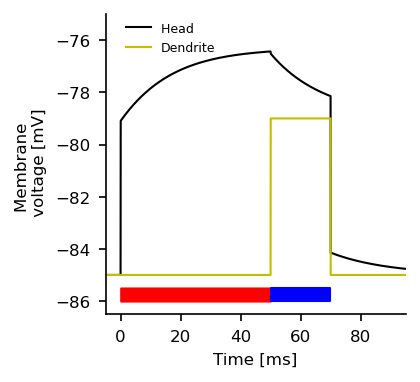

In [10]:
def ax_bAPfollows_comic(fig, pos, resting_potential=-85):
    
    _id = 'experiment_8'
    z_i = 1
    
    (
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(_id)
    
    t = t*1.e3-5
    phi_head = phi[:,1] * 1.e3 + resting_potential + 70.
    phi_dend = phi[:,-1] * 1.e3 + resting_potential + 70.
    
    ax = fig.add_axes(pos)
    ax.plot(t,phi_head, label='Head ', lw=1, color='k')
    
    yshift = + resting_potential + 70.
    input_time = np.nonzero( np.logical_and(t>0, t<50) )[0]
    ax.fill_between(t[input_time], np.zeros(np.size(input_time))-70.5+yshift, np.zeros(np.size(input_time))-71+yshift, zorder=-1, color='red',)# label='Synaptic\ninput')
    
    ax.plot(t,phi_dend, label='Dendrite', lw=1, color='y')
    input_time = np.nonzero( np.logical_and(t>50, t<70) )[0]
    ax.fill_between(t[input_time], np.zeros(np.size(input_time))-70.5+yshift, np.zeros(np.size(input_time))-71+yshift, zorder=-1, color='blue',)# label='Dendritic\nDepol.')
    ax.legend(ncol=1, fontsize=6, frameon=False,loc=(0.05, 0.85))
        
    ax.set_xlabel('Time [ms]', fontsize=8)
    ax.set_ylabel('Membrane \n voltage [mV]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim((-5,95))
    ax.set_ylim((-71.5+yshift,-60+yshift))
        
fig = plt.figure(dpi=150, figsize=(2,2))
ax_bAPfollows_comic(fig, pos=[0,0,1,1])
plt.show()

[0.04999999999999982, 10.049999999999999, 20.05, 30.049999999999997, 40.05, 50.050000000000004] [-0.0008371706835680337, 1.163470806327116, 1.820223027710989, 2.1821448936482915, 2.3787688001407625, 2.4848289506498795]
[0.04999999999999982, 10.049999999999999, 20.05, 30.049999999999997, 40.05, 50.050000000000004] [-0.0008371706835680337, 0.7025354476695583, 1.1094008540723233, 1.3419461771125019, 1.473744208996014, 1.548099611152598]
[0.04999999999999982, 10.049999999999999, 20.05, 30.049999999999997, 40.05, 50.050000000000004] [-0.0008371706835680337, 1.617359338325193, 2.5052540762917284, 2.9752863259128253, 3.2191704208408902, 3.344577837751592]


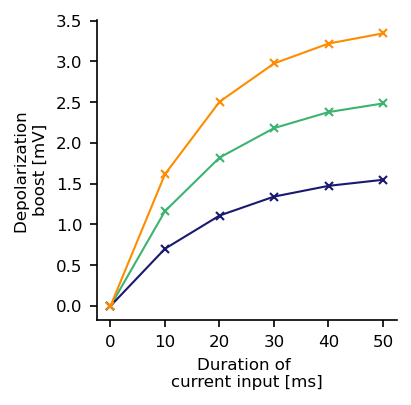

In [11]:
def ax_v_mem_boost_during_bAP(fig,pos,experiments = [
                              ['experiment_'+str(i) for i in range(3,9)],
                              ['experiment_'+str(i) for i in range(40,46)],
                              ['experiment_'+str(i) for i in range(46,52)]]):
    
    ax = fig.add_axes(pos)
    
    colors = [ 'mediumseagreen', 'midnightblue','darkorange']
    
    for i, e_ids in enumerate(experiments):
        
        x_data = []
        y_data = []
        
        for _id, _ti in zip(e_ids, [101 + 200*i for i in range(8)] ):
            z_i = 1

            (
            x,
            a,
            t,
            phi,
            c_Na,
            c_K,
            c_Cl,
            param_set,
            params,
            dx,
            dt,
            r_Na,
            R_Na,
            g_Na_ij,
            r_K,
            R_K,
            g_K_ij,
            r_Cl,
            R_Cl,
            g_Cl_ij,
            r_e,
            R_e,
            g_ij,
            i_c_Na,
            i_c_K,
            i_c_Cl,
            i_e_Na,
            i_e_K,
            i_e_Cl,
            i_e,
            i_c,
            i_total,
            ) = plot.get_results_summary(_id)

            t = t*1.e3-5
            phi_head_boost = (phi[:,1] -phi[:,-1]) * 1.e3
            v_max = phi_head_boost[_ti]
            
            x_data.append(t[_ti])
            y_data.append(v_max)
            
        ax.plot(x_data, y_data, marker='x', lw=1., ms=4, color=colors[i])
        print(x_data, y_data)

        
    ax.set_xlabel('Duration of \ncurrent input [ms]', fontsize=8)
    #ax.set_ylabel('Depol. boost \n during bAP [mV]', fontsize=8)
    ax.set_ylabel('Depolarization \nboost [mV]', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_xlim((-5,95))
    #ax.set_ylim((-71.5,-60))
    
fig = plt.figure(dpi=150, figsize=(2,2))
ax_v_mem_boost_during_bAP(fig, pos=[0,0,1,1])
plt.show()

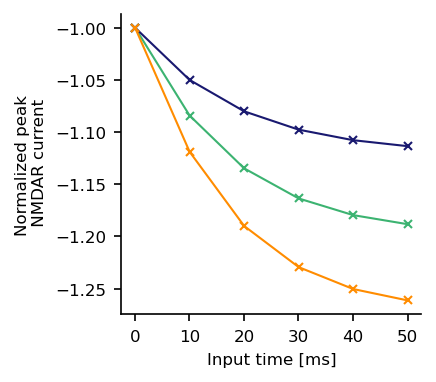

In [12]:
def ax_NMDA_peak_during_bAP(fig,pos,experiments = [
                              ['experiment_'+str(i) for i in range(3,9)],
                              ['experiment_'+str(i) for i in range(40,46)],
                              ['experiment_'+str(i) for i in range(46,52)]],
                           resting_potential=-85):
    
    ax = fig.add_axes(pos)
    
    colors = [ 'mediumseagreen', 'midnightblue','darkorange']
    
    for i, e_ids in enumerate(experiments):
        
        x_data = []
        y_data = []
        for _id, _ti in zip(e_ids, [101 + 200*i for i in range(8)] ):
            z_i = 1

            (
            x,
            a,
            t,
            phi,
            c_Na,
            c_K,
            c_Cl,
            param_set,
            params,
            dx,
            dt,
            r_Na,
            R_Na,
            g_Na_ij,
            r_K,
            R_K,
            g_K_ij,
            r_Cl,
            R_Cl,
            g_Cl_ij,
            r_e,
            R_e,
            g_ij,
            i_c_Na,
            i_c_K,
            i_c_Cl,
            i_e_Na,
            i_e_K,
            i_e_Cl,
            i_e,
            i_c,
            i_total,
            ) = plot.get_results_summary(_id)

            t = t*1.e3-5
            phi_head = phi[:,1] * 1.e3
            v = phi_head[_ti] -70.+resting_potential # transform form -70 to assumed resting potential
            i_max = g_NMDAR_CA1(v) * v 
            x_data.append(t[_ti])
            y_data.append(i_max)
                          
        
        y_data = np.array(y_data)
        y_data = y_data/y_data[0]*np.sign(y_data[0])
        ax.plot(x_data, y_data, marker='x', lw=1., ms=4, color=colors[i])

        
    ax.set_xlabel('Input time [ms]', fontsize=8)
    ax.set_ylabel('Normalized peak\n NMDAR current', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_xlim((-5,95))
    #ax.set_ylim((-71.5,-60))
    
fig = plt.figure(dpi=150, figsize=(2,2))
ax_NMDA_peak_during_bAP(fig, pos=[0,0,1,1])
plt.show()

# TODO
Test for three parameters: R_neck, V_head, I_inj
    
    increased R_neck (a_neck): increases decay time constant, increases head depol
    increased V_head (a_head): decreases concentration changes
    increased I_inj (g_syn): increases concentration changes
    
Tip: set bAP volatage comparable to EPSP voltage otherwise i_NMDA will be mainly set by bAP-depol

    a_neck = {15,25,35,45,55}
    a_head = {150,250,350,450}
    g_syn = {10,20,25,30,40,50}

/tmp/ipykernel_20031/3833445149.py:47: RuntimeWarning: invalid value encountered in divide
  y_data_2 = y_data_2 / y_data_2 - 4.


[0.04999999999999982, 10.049999999999999, 20.05, 30.049999999999997, 40.05, 50.050000000000004] [-0.0008371706835680337, 1.163470806327116, 1.820223027710989, 2.1821448936482915, 2.3787688001407625, 2.4848289506498795]
[0.04999999999999982, 10.049999999999999, 20.05, 30.049999999999997, 40.05, 50.050000000000004] [-0.0008371706835680337, 0.7025354476695583, 1.1094008540723233, 1.3419461771125019, 1.473744208996014, 1.548099611152598]
[0.04999999999999982, 10.049999999999999, 20.05, 30.049999999999997, 40.05, 50.050000000000004] [-0.0008371706835680337, 1.617359338325193, 2.5052540762917284, 2.9752863259128253, 3.2191704208408902, 3.344577837751592]


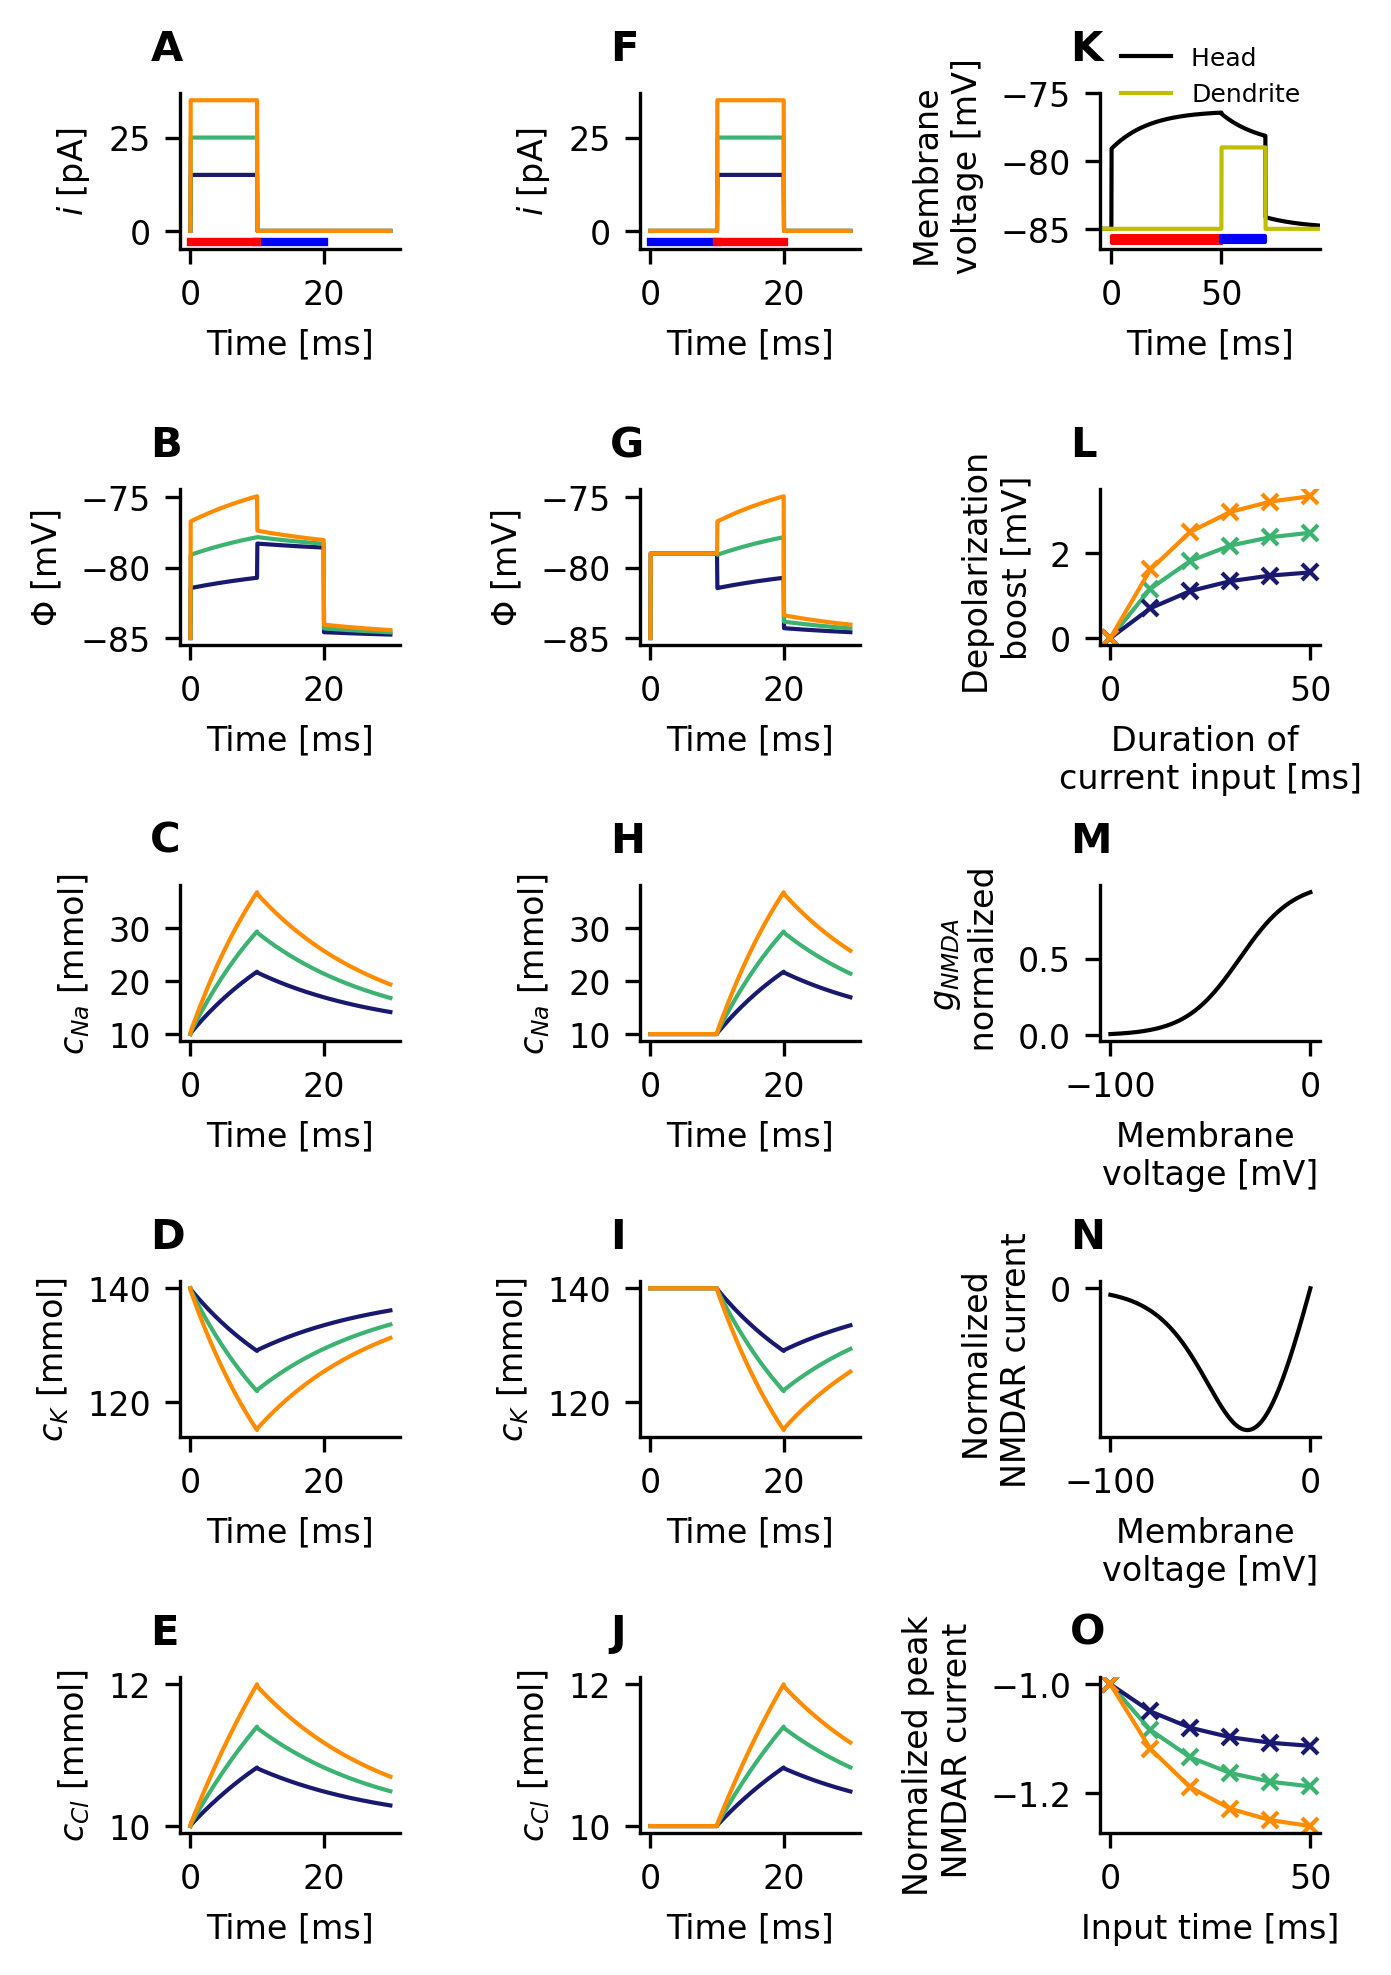

In [14]:



def ax_head_var(fig, pos, experiment_ids, var='phi', y_label=None, x_label=None, y_lim=None, x_lim=None, y_ticks=None, x_ticks=None, resting_potential=-85):
    colors = [ 'midnightblue','mediumseagreen', 'darkorange']
    ax = fig.add_axes(pos)
    
    for col, _id in zip(colors, experiment_ids):
         
        (x,a,t,phi,
        c_Na,c_K,c_Cl,
        param_set,params,
        dx,dt,
        r_Na,R_Na,g_Na_ij,r_K,R_K,g_K_ij,r_Cl,R_Cl,g_Cl_ij,r_e,R_e,g_ij,
        i_c_Na,i_c_K,i_c_Cl,i_e_Na,i_e_K,i_e_Cl,i_e,i_c,i_total,
        ) = plot.get_results_summary(_id)
        cum_R = np.cumsum(1./g_ij, axis=1)
        
        if var == 'phi':
            y_data = phi[:,1]*1.e3 + resting_potential + 70.
        elif var =='i_total':
            y_data = i_total[:,1]*1.e12 
        elif var == 'c_Na':    
            y_data = c_Na[:,1]
        elif var == 'c_K':    
            y_data = c_K[:,1]
        elif var == 'c_Cl':    
            y_data = c_Cl[:,1]
        elif var == 'cum_R':
            y_data = cum_R[:,-1]/cum_R[0,-1]
        
        ax.plot(t*1.e3, y_data, color=col, lw=1)
        
    ax.tick_params(labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if y_label:
        ax.set_ylabel(y_label, fontsize=8)
    else: 
        ax.set_ylabel('')
    if x_label:
        ax.set_xlabel(x_label, fontsize=8)
    else: 
        ax.set_xlabel('')
    
    if var =='i_total':
        y_data_2 = phi[:,-1]*1.e3 + resting_potential + 70.
        y_data_2_mask  = y_data_2 > -80.
        y_data_2 = y_data[y_data_2_mask]
        y_data_2 = y_data_2 / y_data_2 - 4.
        ax.plot(t[y_data_2_mask]*1.e3, y_data_2, color='b', lw=2)
        y_data_2 = phi[:,-1]*1.e3 + resting_potential + 70.
        y_data_2_mask  = y_data > 10.
        y_data_2 = y_data[y_data_2_mask]
        y_data_2 = y_data_2 / y_data_2 - 4.
        ax.plot(t[y_data_2_mask]*1.e3, y_data_2, color='r', lw=2)
        
    dualx = False
    if var =='i_total' and dualx:
        ax2 = ax.twinx()  
        y_data_2 = phi[:,-1]*1.e3 + resting_potential + 70.
        ax2.plot(t*1.e3, y_data_2, color='k', lw=1)
        #ax2.set_ylim(4, 20);
        yshift = + resting_potential + 70.
        ax2.set_ylim((-71.5+yshift,-60+yshift))
        ax2.set_yticks((-85,-80,-75))
        ax2.set_yticklabels(())
        ax2.set_ylabel('')
        ax2.spines['top'].set_visible(False)



n_columns = 3
n_rows = 5


# all in unit inch

fig_width = 5.0
fig_height = fig_height = 7.0
dx = 0.8
dy = dx
wx = (fig_width - n_columns * dx - 0.5 * dx) / n_columns
wy = (fig_height  - n_rows * dy - 0.5 * dy ) / n_rows



# relativie coords 
x_min = [(dx + n*(wx+dx))/fig_width for n in range(n_columns) ]
y_min = [(dy + n*(wy+dy))/fig_height for n in range(n_rows) ]
wx_r = wx/fig_width
wy_r = wy/fig_height

pos1 = [x_min[0], y_min[4], wx_r, wy_r]
pos2 = [x_min[1], y_min[4], wx_r, wy_r]
pos3 = [x_min[2], y_min[4], wx_r, wy_r]
pos4 = [x_min[0], y_min[3], wx_r, wy_r]
pos5 = [x_min[1], y_min[3], wx_r, wy_r]
pos6 = [x_min[2], y_min[3], wx_r, wy_r]
pos7 = [x_min[0], y_min[2], wx_r, wy_r]
pos8 = [x_min[1], y_min[2], wx_r, wy_r]
pos9 = [x_min[2], y_min[2], wx_r, wy_r]
pos10 = [x_min[0], y_min[1], wx_r, wy_r]
pos11 = [x_min[1], y_min[1], wx_r, wy_r]
pos12 = [x_min[2], y_min[1], wx_r, wy_r]
pos13 = [x_min[0], y_min[0], wx_r, wy_r]
pos14 = [x_min[1], y_min[0], wx_r, wy_r]
pos15 = [x_min[2], y_min[0], wx_r, wy_r]

fig = plt.figure(dpi=300, figsize=(fig_width, fig_height))

# column 1
e_ids = ['experiment_37', 'experiment_38', 'experiment_39',] # 'experiment_52',
ax_head_var(fig, pos5,  experiment_ids=e_ids, var='phi', x_label='Time [ms]', y_label='$\Phi$ [mV]')
ax_head_var(fig, pos2,  experiment_ids=e_ids, var='i_total', x_label='Time [ms]', y_label=r'$i$ [pA]')
ax_head_var(fig, pos8,  experiment_ids=e_ids, var='c_Na', x_label='Time [ms]', y_label=r'$c_{Na}$ [mmol]')
ax_head_var(fig, pos11, experiment_ids=e_ids, var='c_K', x_label='Time [ms]', y_label=r'$c_{K}$ [mmol]')
ax_head_var(fig, pos14, experiment_ids=e_ids, var='c_Cl', x_label='Time [ms]', y_label=r'$c_{Cl}$ [mmol]')

# column 2
e_ids = ['experiment_34', 'experiment_35', 'experiment_36',]
ax_head_var(fig, pos4,   experiment_ids= e_ids, var='phi', x_label='Time [ms]', y_label='$\Phi$ [mV]')
ax_head_var(fig, pos1,   experiment_ids=e_ids, var='i_total', x_label='Time [ms]', y_label=r'$i$ [pA]')
ax_head_var(fig, pos7,   experiment_ids=e_ids, var='c_Na', x_label='Time [ms]', y_label=r'$c_{Na}$ [mmol]')
ax_head_var(fig, pos10,  experiment_ids=e_ids, var='c_K', x_label='Time [ms]', y_label=r'$c_{K}$ [mmol]')
ax_head_var(fig, pos13,  experiment_ids=e_ids, var='c_Cl', x_label='Time [ms]', y_label=r'$c_{Cl}$ [mmol]')

# column 3
ax_bAPfollows_comic(fig, pos3)
ax_v_mem_boost_during_bAP(fig, pos6)
ax_g_NMDAR(fig, pos9, 0.073, -0.074)
ax_NMDAR_current(fig, pos12, 0.073, -0.074)
ax_NMDA_peak_during_bAP(fig, pos15)

dxt=-0.02
dyt=0.09
fig.text(pos1[0]+dxt, pos1[1]+dyt, 'A', fontsize=10, weight='bold')
fig.text(pos4[0]+dxt, pos4[1]+dyt, 'B', fontsize=10, weight='bold')
fig.text(pos7[0]+dxt, pos7[1]+dyt, 'C', fontsize=10, weight='bold')
fig.text(pos10[0]+dxt, pos10[1]+dyt, 'D', fontsize=10, weight='bold')
fig.text(pos13[0]+dxt, pos13[1]+dyt, 'E', fontsize=10, weight='bold')
fig.text(pos2[0]+dxt, pos2[1]+dyt, 'F', fontsize=10, weight='bold')
fig.text(pos5[0]+dxt, pos5[1]+dyt, 'G', fontsize=10, weight='bold')
fig.text(pos8[0]+dxt, pos8[1]+dyt, 'H', fontsize=10, weight='bold')
fig.text(pos11[0]+dxt, pos11[1]+dyt, 'I', fontsize=10, weight='bold')
fig.text(pos14[0]+dxt, pos14[1]+dyt, 'J', fontsize=10, weight='bold')
fig.text(pos3[0]+dxt, pos3[1]+dyt, 'K', fontsize=10, weight='bold')
fig.text(pos6[0]+dxt, pos6[1]+dyt, 'L', fontsize=10, weight='bold')
fig.text(pos9[0]+dxt, pos9[1]+dyt, 'M', fontsize=10, weight='bold')
fig.text(pos12[0]+dxt, pos12[1]+dyt, 'N', fontsize=10, weight='bold')
fig.text(pos15[0]+dxt, pos15[1]+dyt, 'O', fontsize=10, weight='bold')

plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure04.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure04.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure04.tif')

plt.show()


# Figure 4
    A-E) First input current for 10 ms then depolarisation of dendrite.
    F-J) First depolarization of dendrite for 10 ms then input current for 10 ms.
    K) Input current time gets increased and max depol during dendritc depol. gets measured (explanation figure)
    L) COnductivity of NMDARs as function of voltage
    M) Normalized NMDAR-current as function of voltage
    N) NMDAR-current peak during 10 ms dendritc depol as function of previous input current time
    O) Summed NMDAR-current uring 10 ms dendritc depol as function of previous input current time

# Increase of peak calcium influx as function of depolarization boost

In [ ]:
a,b= 0.073, -0.074

resting_potential=-85

g_NMDAR_CA1 = get_normalized_NMDAR_conductance(a=a, b=b)
    
v = np.linspace(resting_potential, resting_potential+4,10)
g = g_NMDAR_CA1(v)
i = v * g
i

In [10]:
i / i[0]

array([1.        , 1.02718113, 1.05504347, 1.08360117, 1.11286851,
       1.14285991, 1.17358989, 1.20507308, 1.2373242 , 1.27035806])

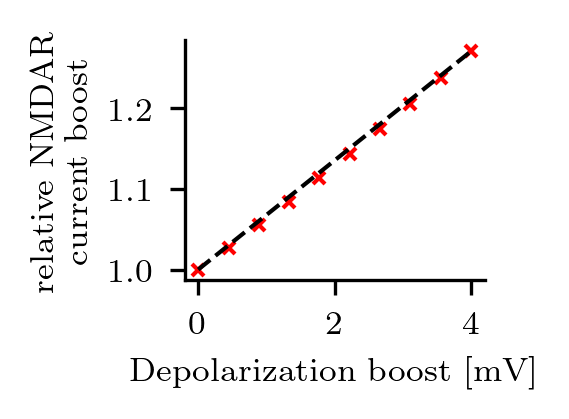

In [36]:

fig = plt.figure(figsize=(1,0.8), dpi=300)
pos = [0,0,1,1]

ax = fig.add_axes(pos)
    
x,y = v-resting_potential,i/i[0]
ax.plot(x,y, 'rx', lw=1, markersize=3.)
#ax.plot(v-resting_potential,i/i[0], 'kx', lw=1)
ax.plot([x[0],x[-1]],[y[0],y[-1]], 'k--', lw=1., markersize=1.)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Depolarization boost [mV]', fontsize=8)
ax.set_ylabel('relative NMDAR \n current boost', fontsize=8)

ax.tick_params(labelsize=8)





1.6666666666666667


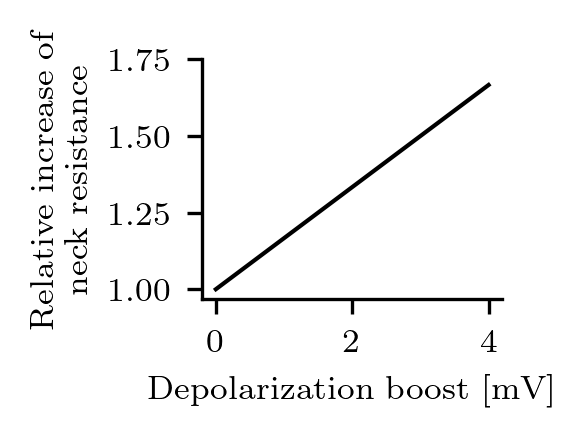

In [32]:
i_syn = 25*1.e-12 # 23 pA
delta_v = 6*1.e-3 # 6 mV between head and dendrite
v_boost = np.linspace(0.,4., 100) * 1.e-3  # boost of v_head through diffusion currents
r_0 = delta_v / i_syn  #  ohm
r_boost = (v_boost+ delta_v) / i_syn



fig = plt.figure(figsize=(1,0.8), dpi=300)
pos = [0,0,1,1]

ax = fig.add_axes(pos)
    
x,y = v_boost*1.e3, r_boost / r_0 #* 1.e-6 # mega ohm
ax.plot(x,y, 'k-', lw=1, markersize=3.)
#ax.plot(v-resting_potential,i/i[0], 'kx', lw=1)
#ax.plot([x[0],x[-1]],[y[0],y[-1]], 'k--', lw=1., markersize=1.)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Depolarization boost [mV]', fontsize=8)
ax.set_ylabel('Relative increase of \n neck resistance', fontsize=8)
ax.set_xticks((0,2,4))
ax.set_yticks((1,1.25,1.5,1.75))

ax.tick_params(labelsize=8)
print(np.max(y))
